In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the dataset
data = pd.read_csv('train.csv')

In [3]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
# Display the first few rows of the dataset
print(data.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Cat

In [5]:
# Summary statistics for numerical columns
print(data.describe())

            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [6]:
# Count of unique values in each column
print(data.nunique())

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64


In [7]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

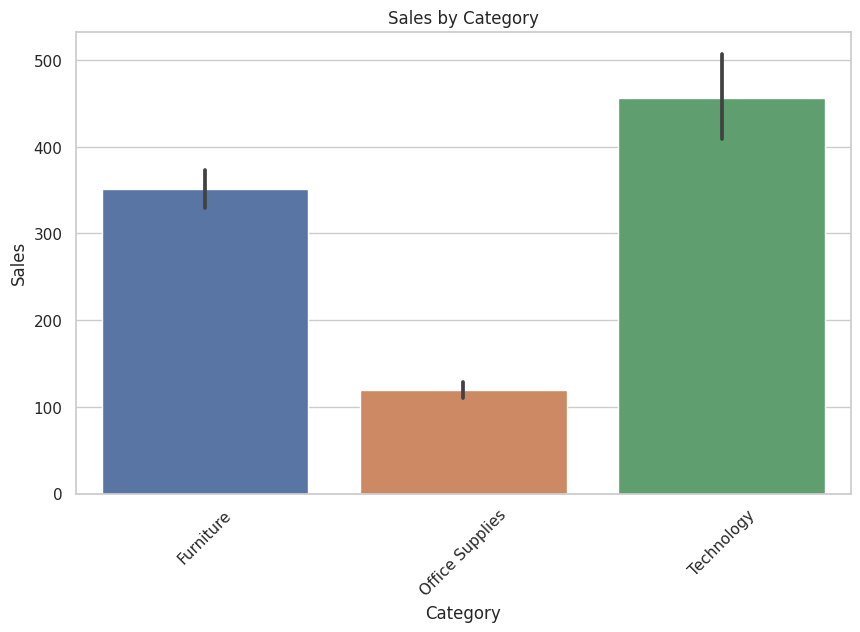

In [8]:
# Bar plot: Sales by Category
plt.figure(figsize=(10, 6))
sns.barplot(x="Category", y="Sales", data=data)
plt.title('Sales by Category')
plt.xticks(rotation=45)
plt.show()

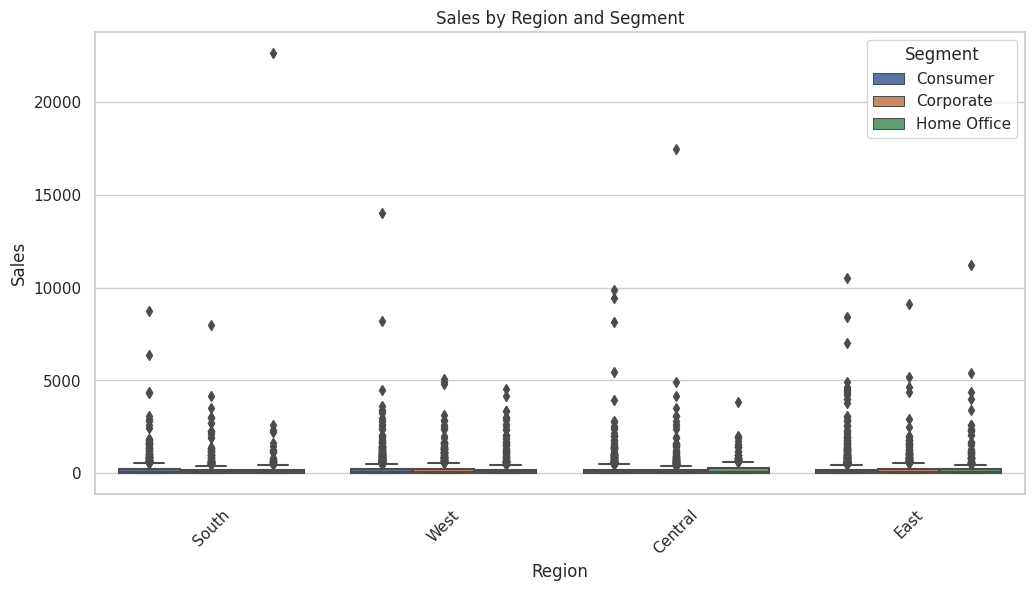

In [9]:
# Box plot: Sales by Region and Segment
plt.figure(figsize=(12, 6))
sns.boxplot(x="Region", y="Sales", hue="Segment", data=data)
plt.title('Sales by Region and Segment')
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-f8e95d640068>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Order Date'] = pd.to_datetime(data['Order Date'])


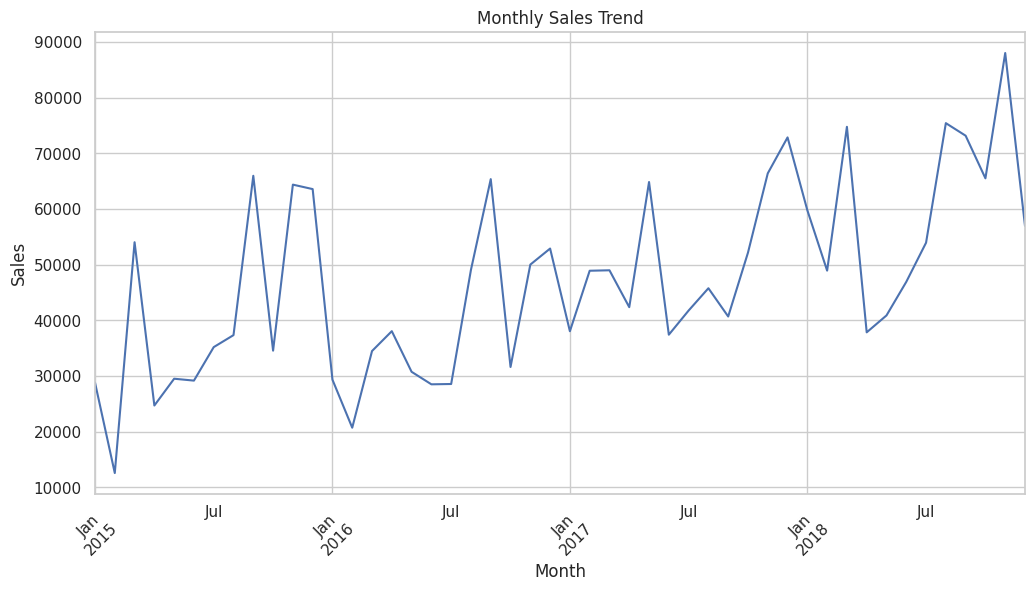

In [10]:
# Line plot: Monthly Sales Trend
data['Order Date'] = pd.to_datetime(data['Order Date'])
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

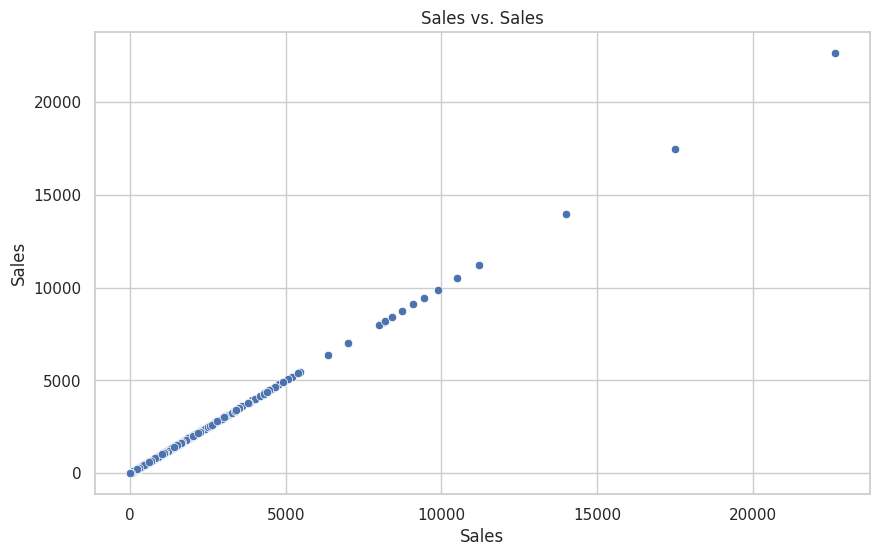

In [13]:
# Scatter plot: Sales vs. Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Sales", y="Sales", data=data)  # Using the 'Sales' column for both x and y axes
plt.title('Sales vs. Sales')  # You can update the title accordingly
plt.show()

<ipython-input-14-94f09d8e0b18>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


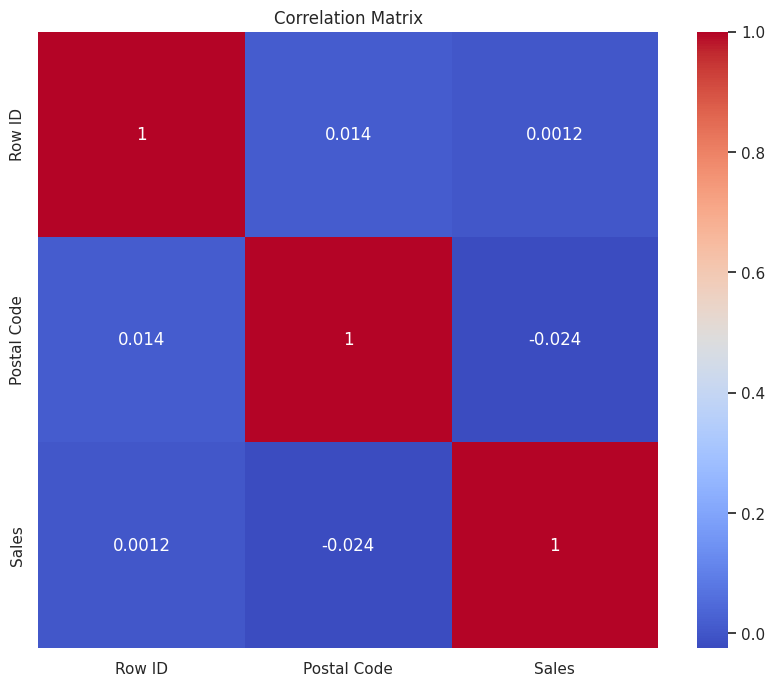

In [14]:
# Heatmap: Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Total sales
total_sales = data['Sales'].sum()
print(f'Total Sales: ${total_sales:.2f}')

Total Sales: $2261536.78


In [16]:
# Average sales per category
avg_sales_per_category = data.groupby('Category')['Sales'].mean()
print('Average Sales per Category:')
print(avg_sales_per_category)

Average Sales per Category:
Category
Furniture          350.653790
Office Supplies    119.381001
Technology         456.401474
Name: Sales, dtype: float64


In [17]:
# Sales distribution by region
sales_by_region = data.groupby('Region')['Sales'].sum()
print('Sales Distribution by Region:')
print(sales_by_region)

Sales Distribution by Region:
Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


In [18]:
# Top selling products
top_selling_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
print('Top Selling Products:')
print(top_selling_products.head(10))

Top Selling Products:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


In [19]:
# Sales trend over time
data['Order Date'] = pd.to_datetime(data['Order Date'])
monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()
print('Monthly Sales Trend:')
print(monthly_sales)

Monthly Sales Trend:
Order Date
2015-01    28828.2540
2015-02    12588.4840
2015-03    54027.6920
2015-04    24710.0160
2015-05    29520.4900
2015-06    29181.3346
2015-07    35194.5580
2015-08    37349.2655
2015-09    65956.3998
2015-10    34561.9470
2015-11    64369.4565
2015-12    63568.3107
2016-01    29347.3864
2016-02    20728.3520
2016-03    34489.6776
2016-04    38056.9685
2016-05    30761.5585
2016-06    28515.9082
2016-07    28573.3100
2016-08    49076.9300
2016-09    65352.9970
2016-10    31631.8890
2016-11    50009.1450
2016-12    52891.8832
2017-01    38048.1840
2017-02    48907.5900
2017-03    48990.1410
2017-04    42368.0480
2017-05    64836.2518
2017-06    37424.6810
2017-07    41761.9430
2017-08    45766.8144
2017-09    40692.3063
2017-10    52156.9580
2017-11    66392.5470
2017-12    72847.0855
2018-01    59767.0910
2018-02    48928.8334
2018-03    74748.6238
2018-04    37849.2156
2018-05    40882.4464
2018-06    46912.8475
2018-07    53942.7755
2018-08    75408.7840


In [20]:
# Average sales per segment and category
avg_sales_segment_category = data.groupby(['Segment', 'Category'])['Sales'].mean()
print('Average Sales per Segment and Category:')
print(avg_sales_segment_category)

Average Sales per Segment and Category:
Segment      Category       
Consumer     Furniture          354.708379
             Office Supplies    116.976760
             Technology         428.431266
Corporate    Furniture          350.830735
             Office Supplies    125.704170
             Technology         450.261692
Home Office  Furniture          337.928896
             Office Supplies    115.691831
             Technology         544.484690
Name: Sales, dtype: float64


In [21]:
# Correlation between numerical columns
correlation_matrix = data.corr()
print('Correlation Matrix:')
print(correlation_matrix)

Correlation Matrix:
               Row ID  Postal Code     Sales
Row ID       1.000000     0.013645  0.001151
Postal Code  0.013645     1.000000 -0.024067
Sales        0.001151    -0.024067  1.000000


<ipython-input-21-0416ff1088e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [25]:
sales_data = data['Sales']

In [26]:
# Split data into train and test sets
train_size = int(0.8 * len(sales_data))
train_data, test_data = sales_data[:train_size], sales_data[train_size:]

In [28]:
# Fit ARIMA model
p, d, q = 1, 1, 1
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()


In [29]:
# Forecast future demand
forecast_steps = len(test_data)
forecast = model_fit.forecast(steps=forecast_steps)

In [30]:
# Calculate reorder points and safety stock (simplified example)
lead_time_demand = forecast.mean()  # Average forecasted demand during lead time
safety_stock = 0.2 * lead_time_demand  # Safety stock as a percentage of lead time demand

In [34]:
# Simulate inventory management
inventory = 100  # Initial inventory
reorder_point = lead_time_demand + safety_stock

for t in range(len(test_data)):
    demand = test_data.iloc[t]
    if inventory <= reorder_point:
        order_quantity = lead_time_demand - inventory + safety_stock
        inventory += order_quantity - demand
    else:
        inventory -= demand

    print(f"Time Step {t+1}: Demand = {demand}, Inventory = {inventory}")

Time Step 1: Demand = 1184.72, Inventory = -907.9435078931552
Time Step 2: Demand = 45.96, Inventory = 230.81649210684475
Time Step 3: Demand = 58.05, Inventory = 218.72649210684483
Time Step 4: Demand = 71.28, Inventory = 205.4964921068448
Time Step 5: Demand = 124.404, Inventory = 152.37249210684482
Time Step 6: Demand = 154.9, Inventory = 121.87649210684481
Time Step 7: Demand = 1871.88, Inventory = -1595.1035078931552
Time Step 8: Demand = 16.192, Inventory = 260.5844921068449
Time Step 9: Demand = 18.936, Inventory = 257.8404921068448
Time Step 10: Demand = 12.672, Inventory = 264.1044921068448
Time Step 11: Demand = 5.04, Inventory = 271.7364921068448
Time Step 12: Demand = 8.448, Inventory = 268.3284921068448
Time Step 13: Demand = 20.388, Inventory = 256.3884921068448
Time Step 14: Demand = 9.96, Inventory = 266.8164921068448
Time Step 15: Demand = 320.64, Inventory = -43.863507893155145
Time Step 16: Demand = 52.0, Inventory = 224.77649210684484
Time Step 17: Demand = 25.584, 

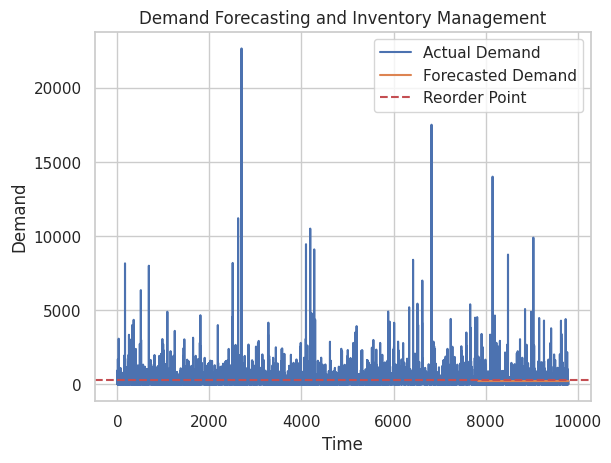

In [35]:
# Plot actual vs. forecasted demand and reorder points
plt.plot(sales_data.index, sales_data, label='Actual Demand')
plt.plot(test_data.index, forecast, label='Forecasted Demand')
plt.axhline(y=reorder_point, color='r', linestyle='--', label='Reorder Point')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Demand')
plt.title('Demand Forecasting and Inventory Management')
plt.show()